A Code with dropped null value and different Oversampler

In [1]:
import pandas as pd

In [2]:
# Opening the Excel
df = pd.read_excel('./E Commerce Dataset.xlsx', sheet_name='E Comm')
print(df)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0 

In [3]:
# Check for unique values of the object datatype
cat_cols = df.dtypes[df.dtypes == 'object'].index

for i in cat_cols:
    print(f"{i} ---> {df[i].unique()}")
    print()

PreferredLoginDevice ---> ['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode ---> ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender ---> ['Female' 'Male']

PreferedOrderCat ---> ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus ---> ['Single' 'Divorced' 'Married']



In [4]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'  
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [5]:
cat_cols = df.dtypes[df.dtypes == 'object'].index

for i in cat_cols:
    print(f"{i} ---> {df[i].unique()}")
    print()

PreferredLoginDevice ---> ['Mobile Phone' 'Computer']

PreferredPaymentMode ---> ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']

Gender ---> ['Female' 'Male']

PreferedOrderCat ---> ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus ---> ['Single' 'Divorced' 'Married']



In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object'):
    df[column] = label_encoder.fit_transform(df[column])

In [8]:
# Checking the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   int32  
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   int32  
 7   Gender                       5630 non-null   int32  
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   int32  
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   int32  
 13  NumberOfAddress   

In [9]:
# Missing Data
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
# Number of Churners vs Non-Churners
df['Churn'].value_counts()

Churn
0    3143
1     631
Name: count, dtype: int64

In [12]:
x = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [13]:
from imblearn.combine import SMOTETomek


In [14]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(x , y)

x_over.shape, y_over.shape

((6134, 19), (6134,))

In [15]:
from  sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=42)

In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
MN = RobustScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

In [19]:
# Usually need to install using 'pip install mlxtend' in cmd
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train_scaled, y_train) 

RandomForestClassifier()

Accuracy = 0.8924497555676263

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0     0.9791    0.8045    0.8833       931
           1     0.8309    0.9824    0.9003       910

    accuracy                         0.8924      1841
   macro avg     0.9050    0.8935    0.8918      1841
weighted avg     0.9058    0.8924    0.8917      1841



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

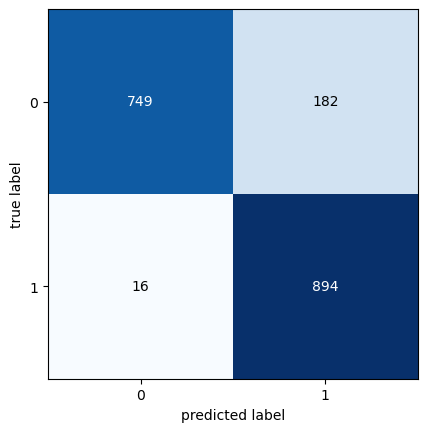

In [21]:
y_pred_rf = rf_model.predict(x_test_scaled) 

accuracy = accuracy_score(y_test, y_pred_rf) 

print(f"Accuracy = {format(accuracy)}") 

print(f"\nClassification Report of Random Forest:\n{classification_report(y_test, y_pred_rf, digits=4)}") 
plot_confusion_matrix(confusion_matrix(y_test , y_pred_rf))

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
ada_clf = AdaBoostClassifier(algorithm='SAMME', random_state=42, learning_rate=0.3, n_estimators=300)

ada_clf.fit(x_train_scaled, y_train) 

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.3, n_estimators=300,
                   random_state=42)

Accuracy = 0.7903313416621401

Classification Report of AdaBoost:
              precision    recall  f1-score   support

           0     0.8697    0.6885    0.7686       931
           1     0.7373    0.8945    0.8083       910

    accuracy                         0.7903      1841
   macro avg     0.8035    0.7915    0.7885      1841
weighted avg     0.8043    0.7903    0.7882      1841



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

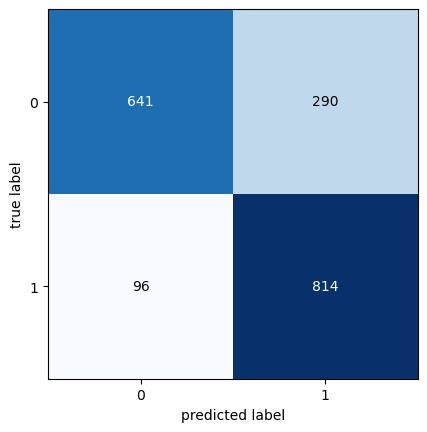

In [24]:
y_pred_ada = ada_clf.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_ada) 

print(f"Accuracy = {format(accuracy)}") 

print(f"\nClassification Report of AdaBoost:\n{classification_report(y_test, y_pred_ada, digits=4)}") 

plot_confusion_matrix(confusion_matrix(y_test , y_pred_ada))

In [25]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Input, Dense # type: ignore

In [26]:
ann_model = Sequential()
ann_model.add(Input(shape=(19,)))  # Input layer with 19 features
ann_model.add(Dense(19, activation='relu'))  # First hidden layer with 32 neurons
ann_model.add(Dense(32, activation='relu'))  # Second hidden layer with 16 neurons
ann_model.add(Dense(1, activation='sigmoid')) # Output Layer

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
churn = ann_model.fit(x_train_scaled, y_train, epochs=50)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6029 - loss: 0.6611
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7656 - loss: 0.5170  
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8203 - loss: 0.4378  
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8283 - loss: 0.4046  
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8342 - loss: 0.3842  
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8422 - loss: 0.3850
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8357 - loss: 0.3656  
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8458 - loss: 0.3483  
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: 0.3611
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8606 - loss: 0.3316  
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8562 - loss: 0.3398  
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy = 0.8859315589353612

Classification Report of ANN:
              precision    recall  f1-score   support

           0     0.9197    0.8485    0.8827       931
           1     0.8564    0.9242    0.8890       910

    accuracy                         0.8859      1841
   macro avg     0.8880    0.8864    0.8858      1841
weighted avg     0.8884    0.8859    0.8858      1841



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

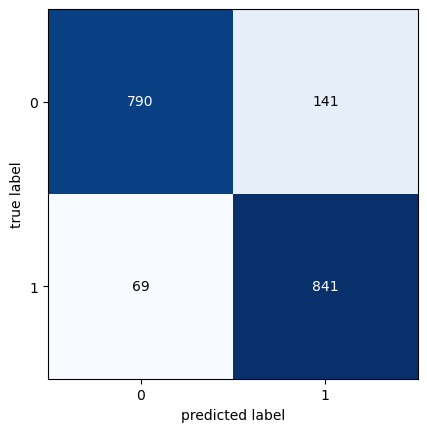

In [27]:
y_pred_ann = ann_model.predict(x_test_scaled)
y_pred_binary = (y_pred_ann > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary) 
print(f"Accuracy = {format(accuracy)}") 

print(f"\nClassification Report of ANN:\n{classification_report(y_test, y_pred_binary, digits=4)}") 
plot_confusion_matrix(confusion_matrix(y_test, y_pred_binary)) # Computes the confusion matrix